# Numerov algorithm

In [18]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#Discretización del dominio - Punto c
def x_discrete(a,b):
    return np.linspace(-5,5,1000)
x = x_discrete(-5,5)

In [20]:
#Potential - Punto D
def potential (x,w):
    return (1/2)*w*(x**2)

#Other potentials -Punto i,j
def gaussianPotential(x):
    return -10*np.exp(-(x**2)/20)

def rationalPotential(x):
    return -4/((1+x**2)**2)

In [21]:
#Algoritmo de numerov - Punto e
def phi2(x_array,E):

    w = 1
    h_barra = 1
    m = 1
    h = 10/999
    result = []

    i = 0
    norm = 0
    for x in x_array:


        if i ==0:
            result.append(0)
        elif i ==1:
            result.append(1e-5)
            norm+=1e-5
        else:
            r_n = ((2*m)/(h_barra**2))*(potential(x_array[i],w)-E)
            r_n_m= ((2*m)/(h_barra**2))*(potential(x_array[i-1],w)-E)
            r_n_m_m= ((2*m)/(h_barra**2))*(potential(x_array[i-2],w)-E)

            num = (2*result[i-1]*(1+((5*(h**2)*r_n_m)/(12))))-(result[i-2]*(1-(((h**2)*r_n_m_m)/(12))))
            den = (1-(((h**2)*r_n)/(12)))

            result.append(num/den)
            norm+=abs(num/den)
        i+=1

    #Normalizar
    result = np.array(result)
    result/=norm
    result = list(result)

    return result

In [22]:
#Valores propios función - Punto f

def findEigenvalues(e_0,e_f,dE,x):

    e = e_0
    eigenValues = []

    while e <= e_f:
        phi_E = phi2(x,e)[-1]
        phi_dE=phi2(x,e+dE)[-1]

        if phi_E*phi_dE <0:
            eigenValues.append(round(e,2))

        e+=dE

    return eigenValues

#Valores propios para potencial 1/2**w*x**2- punto g
eigen = findEigenvalues(0,6,0.001,x)
print("Los valores propios para el operador de energía son:\n {}".format(eigen))

Los valores propios para el operador de energía son:
 [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]


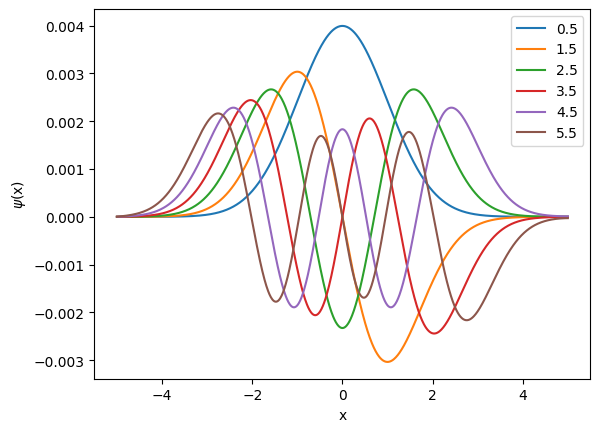

In [28]:
#Gráfico estados propios del operador -Punto h

E = [0.5,1.5,2.5,3.5,4.5,5.5]

for en in E:
    result =phi2(x,en)
    plt.plot(x,result, label = str(en))

plt.xlabel('x')
plt.legend()
plt.ylabel(r'$\psi$(x)')
plt.show()


In [24]:
#Punto i - potencial gaussiano
xg = x_discrete(-10,10)

#Algoritmo de numerov - Punto i
def phig(x_array,E):

    h_barra = 1
    m = 1
    h = 10/999
    result = []

    i = 0
    norm = 0
    for x in x_array:


        if i ==0:
            result.append(0)
        elif i ==1:
            result.append(1e-5)
            norm+=1e-5
        else:
            r_n = ((2*m)/(h_barra**2))*(gaussianPotential(x_array[i])-E)
            r_n_m= ((2*m)/(h_barra**2))*(gaussianPotential(x_array[i-1])-E)
            r_n_m_m= ((2*m)/(h_barra**2))*(gaussianPotential(x_array[i-2])-E)

            num = (2*result[i-1]*(1+((5*(h**2)*r_n_m)/(12))))-(result[i-2]*(1-(((h**2)*r_n_m_m)/(12))))
            den = (1-(((h**2)*r_n)/(12)))

            result.append(num/den)
            norm+=abs(num/den)
        i+=1

    #Normalizar
    result = np.array(result)
    result/=norm
    result = list(result)

    return result
#Valores propios potencial Gaussiano
def findEigenvaluesg(e_0,e_f,dE,x):

    e = e_0
    eigenValues = []

    while e <= e_f:
        phi_E = phig(x,e)[-1]
        phi_dE=phig(x,e+dE)[-1]

        if phi_E*phi_dE <0:
            eigenValues.append(round(e,3))

        e+=dE

    return eigenValues


eigeng = findEigenvaluesg(-10,-5.1,0.001,xg)
print("Los primeros cinco estados ligados para el potencial gaussiano son:\n {}".format(eigeng))

Los primeros cinco estados ligados para el potencial gaussiano son:
 [-9.51, -8.548, -7.625, -6.742, -5.899]


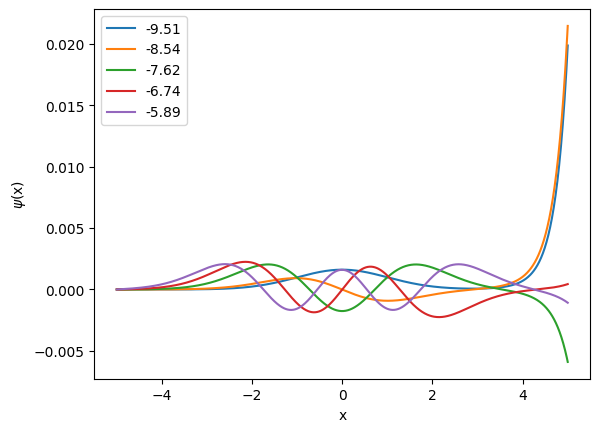

In [25]:
Eg = [-9.51,-8.54,-7.62,-6.74,-5.89]

for en in Eg:
   result =phig(xg,en)
   plt.plot(xg,result, label = str(en))

plt.legend()
plt.xlabel('x')
plt.ylabel(r'$\psi$(x)')
plt.show()

In [26]:
# Punto j - potencial racional
def phir(x_array,E):

    h_barra = 1
    m = 1
    h = 10/999
    result = []

    i = 0
    norm = 0
    for x in x_array:

        2
        if i ==0:
            result.append(0)
        elif i ==1:
            result.append(1e-5)
            norm+=1e-5
        else:
            r_n = ((2*m)/(h_barra**2))*(rationalPotential(x_array[i])-E)
            r_n_m= ((2*m)/(h_barra**2))*(rationalPotential(x_array[i-1])-E)
            r_n_m_m= ((2*m)/(h_barra**2))*(rationalPotential(x_array[i-2])-E)

            num = (2*result[i-1]*(1+((5*(h**2)*r_n_m)/(12))))-(result[i-2]*(1-(((h**2)*r_n_m_m)/(12))))
            den = (1-(((h**2)*r_n)/(12)))

            result.append(num/den)
            norm+=abs(num/den)
        i+=1

    #Normalizar
    result = np.array(result)
    result/=norm
    result = list(result)

    return result
#Valores propios potencial racional
def findEigenvaluesr(e_0,e_f,dE,x):

    e = e_0
    eigenValues = []

    while e <= e_f:
        phi_E = phir(x,e)[-1]
        phi_dE=phir(x,e+dE)[-1]

        if phi_E*phi_dE <0:
            eigenValues.append(round(e,3))

        e+=dE

    return eigenValues


eigenr = findEigenvaluesr(-4,0.1,0.001,xg)
print("Los primeros dos estados ligados para el potencial racional son:\n {}".format(eigenr))

Los primeros dos estados ligados para el potencial racional son:
 [-2.472, -0.426]


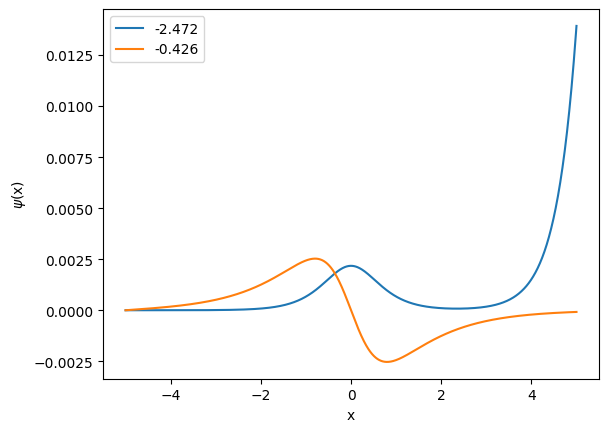

In [27]:
for en in eigenr:
   result =phir(xg,en)
   plt.plot(xg,result, label = str(en))

plt.legend()
plt.xlabel('x')
plt.ylabel(r'$\psi$(x)')
plt.show()

Nota: El calculo de los valores propios demora algunos minutos, ya que se utilizó la precisión dada en el enunciado del ejercicio